<a href="https://colab.research.google.com/github/davidleonardoouuu88/2025-segundo-semestre-ia-economia/blob/main/Taller_Reg_Polin_Martinez%2C%20Alarc%C3%B3n_Leonardo%2CManuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/LinaMariaCastro/curso-ia-para-economia/blob/main/clases/5_Aprendizaje_supervisado/2_Taller_Regresion_Polinomica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inteligencia Artificial con Aplicaciones en Economía I**

- 👩‍🏫 **Profesora:** [Lina María Castro](https://www.linkedin.com/in/lina-maria-castro)  
- 📧 **Email:** [lmcastroco@gmail.com](mailto:lmcastroco@gmail.com)  
- 🎓 **Universidad:** Universidad Externado de Colombia - Facultad de Economía

# **Taller: Regresión Polinómica, Subajuste, Sobreajuste y Regularización**

**IMPORTANTE**: Guarda una copia de este notebook en tu Google Drive o computador.

**Taller en parejas**

**Nombres estudiantes:**

-David Leonardo Martinez Pinzon.
-Manuel Alejandro Alarcón Morales.

**Forma de entrega**

Jupyter Notebook publicado en su cuenta de Github con el nombre “Taller_Reg_Polin_apellidos_estudiantes.ipynb”.

**Plazo de entrega**

30 de octubre, máximo a las 11:59 p.m., debes enviar link del notebook al correo lina.castro6@uexternado.edu.co, de lo contrario, no será tenido en cuenta.

**Instrucciones Generales**

Completa el código en las celdas marcadas con `### TU CÓDIGO AQUÍ ###`. Puedes añadir más celdas si lo requieres.

## **Situación**

Una importante firma de inversión inmobiliaria te ha contratado como consultor de ciencia de datos. Su proceso actual de valoración de propiedades es lento y se basa en la intuición de unos pocos expertos. Quieren que desarrolles un modelo de machine learning para predecir el precio de venta de las viviendas (`SalePrice`) de forma más precisa y sistemática.

Te han entregado el dataset "Ames Housing", que contiene una gran cantidad de información sobre viviendas vendidas recientemente. Tu tarea es construir el mejor modelo posible, pero más importante aún, justificar por qué tu modelo es robusto y fiable, explicando cómo has manejado la complejidad y el riesgo de sobreajuste.

### **Ejercicio 1: Carga y Preparación Inicial de los Datos**

Primero, carguemos las librerías necesarias y el dataset. Nos enfocaremos en un subconjunto de las variables numéricas para mantener el taller manejable, pero el principio se aplica a todo el dataset.

In [1]:
# Importa las librerías necesarias
### TU CÓDIGO AQUÍ ###
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

Mejorar visualización de dataframes y gráficos

In [2]:
# Que muestre todas las columnas
pd.options.display.max_columns = None
# En los dataframes, mostrar los float con dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Configuraciones para una mejor visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

Cargar el dataset

In [3]:
# Usamos el dataset Ames Housing desde su fuente original (requiere internet)
url = 'http://jse.amstat.org/v19n3/decock/AmesHousing.txt'
df = pd.read_csv(url, sep='\t')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.00,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.00,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.00,Unf,0.00,441.00,"1,080.00",GasA,Fa,Y,SBrkr,1656,0,0,1656,1.00,0.00,1,0,3,1,TA,7,Typ,2,Gd,Attchd,"1,960.00",Fin,2.00,528.00,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.00,TA,TA,CBlock,TA,TA,No,Rec,468.00,LwQ,144.00,270.00,882.00,GasA,TA,Y,SBrkr,896,0,0,896,0.00,0.00,1,0,2,1,TA,5,Typ,0,NaN,Attchd,"1,961.00",Unf,1.00,730.00,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.00,TA,TA,CBlock,TA,TA,No,ALQ,923.00,Unf,0.00,406.00,"1,329.00",GasA,TA,Y,SBrkr,1329,0,0,1329,0.00,0.00,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,"1,958.00",Unf,1.00,312.00,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.00,Gd,TA,CBlock,TA,TA,No,ALQ,"1,065.00",Unf,0.00,"1,045.00","2,110.00",GasA,Ex,Y,SBrkr,2110,0,0,2110,1.00,0.00,2,1,3,1,Ex,8,Typ,2,TA,Attchd,"1,968.00",Fin,2.00,522.00,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.00,TA,TA,PConc,Gd,TA,No,GLQ,791.00,Unf,0.00,137.00,928.00,GasA,Gd,Y,SBrkr,928,701,0,1629,0.00,0.00,2,1,3,1,TA,6,Typ,1,TA,Attchd,"1,997.00",Fin,2.00,482.00,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
# Para este taller, solo usaremos algunas columnas clave para simplificar.
df_sub = df[['Overall Qual', 'Gr Liv Area', 'SalePrice']].copy()
df_sub.columns = ['OverallQual', 'GrLivArea', 'SalePrice'] # Renombrar para facilidad
df_sub.head()

,OverallQual,GrLivArea,SalePrice
0,6,1656,215000
1,5,896,105000
2,6,1329,172000
3,7,2110,244000
4,5,1629,189900


**Explicación de las variables del dataset reducido**

1. SalePrice: Precio de Venta.

Esta es la variable objetivo. Es el precio final por el cual se vendió la propiedad, medido en dólares estadounidenses.

2. OverallQual: Calidad General.

Es una variable ordinal que califica la calidad general del material y el acabado de la casa. Es una de las variables predictoras (X) más importantes.

Escala: Va de 1 a 10.

10: Muy Excelente

9: Excelente

...

2: Pobre

1: Muy Pobre

3. GrLivArea: Área Habitable sobre el Nivel del Suelo.

Es una variable numérica que mide el total de metros cuadrados de área habitable que está por encima del nivel del suelo. No incluye el área del sótano. Es una de las variables predictoras (X) más fuertes, ya que, lógicamente, casas más grandes tienden a ser más caras.

In [5]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  2930 non-null   int64
 1   GrLivArea    2930 non-null   int64
 2   SalePrice    2930 non-null   int64
dtypes: int64(3)
memory usage: 68.8 KB


### **Ejercicio 2: Dividir el conjunto de datos**

El método `.info()` muestra que no hay nulos en nuestro subconjunto. ¡Perfecto! Ahora, definamos nuestras variables `X` (predictoras) e `y` (objetivo) y dividamos los datos.

In [9]:
# Definir X e y
### TU CÓDIGO AQUÍ ###
# 1. Seleccionar las variables de interés
X = df_sub[['OverallQual', 'GrLivArea']]
y = df_sub['SalePrice']



In [8]:
# Dividir en entrenamiento y prueba (70/30)
### TU CÓDIGO AQUÍ ###
# 2. Dividir en conjuntos de entrenamiento y prueba (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamaño del set de Entrenamiento: {X_train.shape[0]} observaciones")
print(f"Tamaño del set de Prueba: {X_test.shape[0]} observaciones")

Tamaño del set de Entrenamiento: 2051 observaciones
Tamaño del set de Prueba: 879 observaciones


### **Ejercicio 3: Modelo con Sobreajuste**

Vamos a crear un modelo muy complejo para ver qué tan mal puede generalizar.

**Crear un Modelo Polinómico de Grado 5**

Usa `Pipeline` para combinar `PolynomialFeatures` (grado 5), `StandardScaler` y `LinearRegression`. Entrénalo con los datos de entrenamiento.

In [16]:
# Crear el pipeline para el modelo polinómico
### TU CÓDIGO AQUÍ ###

# Crear el pipeline
modelo = Pipeline([
    ('polinomio', PolynomialFeatures(degree=5, include_bias=False)), ('escalador', StandardScaler()), ('regresion', LinearRegression())])

In [17]:
# Entrenar el modelo
modelo.fit(X_train, y_train)

Pipeline(steps=[('polinomio', PolynomialFeatures(degree=5, include_bias=False)),
                ('escalador', StandardScaler()),
                ('regresion', LinearRegression())])

In [19]:
# Calcular el error (RMSE) en entrenamiento y prueba y realizar un print de estos

y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"RMSE Entrenamiento: {rmse_train:.4f}")
print(f"RMSE Prueba: {rmse_test:.4f}")


RMSE Entrenamiento: 34152.3495
RMSE Prueba: 41101.6027


In [39]:
41101.6027-35206.6327


5894.970000000001

**Pregunta:** ¿Qué indica la diferencia que observas entre el error de entrenamiento y el de prueba? ¿Le recomendarías este modelo a la firma inmobiliaria? ¿Por qué?

Existe un sobreajuste demasiado alto, la diferencia entre los modelos de entrenamiento y prueba denota que este modelo aunque trata de comprender la database no logra explicarla de la mejor manera. Expreso una negativa en la recomendación del modelo. La diferencia entre los dos modelos es de 5894.9700

### **Ejercicio 4: Aplicar Regularización**

Ahora, vamos a "curar" el sobreajuste. Usaremos los mismos `PolynomialFeatures` de grado 5, pero cambiaremos el modelo de regresión.

**Implementar Regresión Ridge**

Copia el pipeline anterior, pero reemplaza `LinearRegression` con `Ridge(alpha=10)`. `alpha` es la fuerza de la penalización.

In [20]:
# Crear el pipeline para Ridge
### TU CÓDIGO AQUÍ ##
ridge = Pipeline([
    ('polinomio', PolynomialFeatures(degree=5, include_bias=False)), ('escalador', StandardScaler()), ('regresion', Ridge(alpha=10))])

In [22]:
# Entrenar el modelo
### TU CÓDIGO AQUÍ ###
ridge.fit(X_train, y_train)

Pipeline(steps=[('polinomio', PolynomialFeatures(degree=5, include_bias=False)),
                ('escalador', StandardScaler()),
                ('regresion', Ridge(alpha=10))])

In [23]:
# Calcular el error (RMSE) en entrenamiento y prueba y realizar un print de estos
### TU CÓDIGO AQUÍ ###
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"RMSE Entrenamiento: {rmse_train:.4f}")
print(f"RMSE Prueba: {rmse_test:.4f}")

RMSE Entrenamiento: 35204.8904
RMSE Prueba: 35206.6295


In [41]:
35204.8904-35206.6295


-1.7391000000061467

El sobreajuste entre el entrenamiento y la prueba es minimo. Por ende el modelo ridge es preciso.

**Interpreta los resultados:**

12312312

**Implementar Regresión Lasso**

Haz lo mismo, pero ahora con `Lasso(alpha=500, max_iter=10000)`. Lasso necesita un `alpha` más grande (porque la penalización L1 es diferente) y a veces más `max_iter` para converger.

In [24]:
# Crear el pipeline para Lasso
### TU CÓDIGO AQUÍ ###
lasso = Pipeline([
    ('polinomio', PolynomialFeatures(degree=5, include_bias=False)), ('escalador', StandardScaler()), ('regresion', Lasso(alpha=500, max_iter=10000))])


In [25]:
# Entrenar el modelo
### TU CÓDIGO AQUÍ ###
lasso.fit(X_train, y_train)

Pipeline(steps=[('polinomio', PolynomialFeatures(degree=5, include_bias=False)),
                ('escalador', StandardScaler()),
                ('regresion', Lasso(alpha=500, max_iter=10000))])

In [26]:
# Calcular el error (RMSE) en entrenamiento y prueba y realizar un print de estos
### TU CÓDIGO AQUÍ ###
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"RMSE Entrenamiento: {rmse_train:.4f}")
print(f"RMSE Prueba: {rmse_test:.4f}")

RMSE Entrenamiento: 35352.9244
RMSE Prueba: 35447.7132


In [42]:
35352.9244-35447.7132

-94.78879999999481

**Interpreta los resultados:**

El sobreajuste del modelo lasso es mucho mayor que el del Ridge. Es preciso, pero no tanto como el Ridge. Se sigue sugiriendo el ridge.

**Selección de Variables con Lasso**

Una de las grandes ventajas de Lasso es que puede eliminar variables. Vamos a ver cuántas de las características polinómicas que creamos (ej. `OverallQual^2`, `GrLivArea^5`, `OverallQual * GrLivArea^4`, etc.) fueron eliminadas.

In [28]:
# Extraer los coeficientes del modelo Lasso
### TU CÓDIGO AQUÍ ###
lasso_coef = lasso.named_steps['regresion'].coef_
print(lasso_coef)


[  1963.76821109      0.              0.          35444.97862341
      0.              0.          10560.00802868      0.
      0.              0.          21555.1038162       0.
      0.             -0.           9492.34283088      0.
      0.             -0.             -0.         -20625.70275837]


In [29]:
# Extraer los nombres de las características generadas
feature_names = lasso.named_steps['polinomio'].get_feature_names_out(X.columns)
print(feature_names)
# Guíate por el siguiente código: feature_names = pipeline_lasso.named_steps['poly_features'].get_feature_names_out(X.columns)
### TU CÓDIGO AQUÍ ###

['OverallQual' 'GrLivArea' 'OverallQual^2' 'OverallQual GrLivArea'
 'GrLivArea^2' 'OverallQual^3' 'OverallQual^2 GrLivArea'
 'OverallQual GrLivArea^2' 'GrLivArea^3' 'OverallQual^4'
 'OverallQual^3 GrLivArea' 'OverallQual^2 GrLivArea^2'
 'OverallQual GrLivArea^3' 'GrLivArea^4' 'OverallQual^5'
 'OverallQual^4 GrLivArea' 'OverallQual^3 GrLivArea^2'
 'OverallQual^2 GrLivArea^3' 'OverallQual GrLivArea^4' 'GrLivArea^5']


In [30]:
# Contar cuántos coeficientes son exactamente cero
### TU CÓDIGO AQUÍ ###
lasso_coef_zero = np.sum(lasso_coef == 0)
print(lasso_coef_zero)

14


In [31]:
# Realizar un print de:
# Número total de características polinómicas generadas
# Número de características eliminadas por Lasso (coef = 0)
# Número de características CONSERVADAS
# Porcentaje de variables eliminadas
# Lista con los nombres de las características conservadas por Lasso (coef != 0)

### TU CÓDIGO AQUÍ ###
print(f"Número total de características polinómicas generadas: {len(feature_names)}")
print(f"Número de características eliminadas por Lasso (coef = 0): {lasso_coef_zero}")
print(f"Número de características conservadas por Lasso (coef != 0): {len(feature_names) - lasso_coef_zero}")
print(f"Porcentaje de variables eliminadas: {lasso_coef_zero / len(feature_names) * 100:.2f}%")
print(f"Lista con los nombres de las características conservadas por Lasso (coef != 0): {feature_names[lasso_coef != 0]}")



Número total de características polinómicas generadas: 20
Número de características eliminadas por Lasso (coef = 0): 14
Número de características conservadas por Lasso (coef != 0): 6
Porcentaje de variables eliminadas: 70.00%
Lista con los nombres de las características conservadas por Lasso (coef != 0): ['OverallQual' 'OverallQual GrLivArea' 'OverallQual^2 GrLivArea'
 'OverallQual^3 GrLivArea' 'OverallQual^5' 'GrLivArea^5']


**Interpreta los resultados:**

El modelo logró simplificar la dimensionalidad del ejercicio de 20 a 6 variables. Lo que permite realizar analisis más simplificados respondiendo al concepto puro de modelo.

### **Ejercicio 5: Conclusión y Recomendación para el Cliente**

**Resumir los Resultados**

Crea un `DataFrame` de pandas que compare el RMSE de entrenamiento y prueba de los tres modelos (Polinómico, Ridge, Lasso) y ordena los modelos según el RMSE de prueba de menor a mayor.

In [34]:
# Calcular el error (RMSE) para Ridge y Lasso y asignarlos a variables
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

# Crear DataFrame de resultados
df_resultados = pd.DataFrame({
    'Modelo': ['Polinómico', 'Ridge', 'Lasso'],
    'RMSE_Entrenamiento': [rmse_train, rmse_train_ridge, rmse_train_lasso],
    'RMSE_Prueba': [rmse_test, rmse_test_ridge, rmse_test_lasso]
})

# Ordenar por RMSE de prueba
df_resultados = df_resultados.sort_values(by='RMSE_Prueba')

display(df_resultados)

,Modelo,RMSE_Entrenamiento,RMSE_Prueba
1,Ridge,"35,204.89","35,206.63"
0,Polinómico,"35,352.92","35,447.71"
2,Lasso,"35,352.92","35,447.71"


**Pregunta Final:**

Basado en tu análisis, ¿qué modelo le recomendarías a la firma inmobiliaria? Tu respuesta debe incluir:

1.  Una recomendación clara del mejor modelo.

Recomendaría el modelo Ridge como el más adecuado para la firma inmobiliaria.
Ofrece el mejor equilibrio entre precisión y estabilidad, reduciendo el sobreajuste que tenía el modelo polinómico sin perder capacidad predictiva.

2.  Una explicación en términos sencillos (para un gerente, no para un científico de datos) de por qué el modelo polinómico simple no era una buena idea, usando el concepto de "memorizar vs. generalizar".

El modelo polinómico de grado 5 fue como un estudiante que memoriza todo el examen de práctica, obtuvo un error muy bajo en entrenamiento, pero falló al enfrentarse a nuevos datos.
Eso se llama sobreajuste, el modelo aprendió demasiado los detalles del pasado y perdió la capacidad de generalizar hacia el futuro. En cambio, el modelo Ridge funciona como un estudiante que entiende los principios fundamentales, no necesita memorizar todo, porque se concentra en los patrones realmente importantes. Por eso sus errores son parecidos tanto en entrenamiento como en prueba: aprende lo suficiente para rendir bien con nuevos datos.

3.  Una descripción de la ventaja principal del modelo Lasso en cuanto a la interpretabilidad y la selección de las características más importantes.

El Lasso tiene una ventaja estratégica para la interpretación: además de ajustar, elimina automáticamente variables poco relevantes.
En este caso, eliminó el 70% de las combinaciones polinómicas generadas, conservando solo 6 características clave.
Eso lo convierte en un modelo más simple, interpretable y económico en términos de complejidad computacional. Sin embargo, su precisión fue ligeramente menor que la del Ridge, por lo cual no es el más preciso, pero sí el más transparente y fácil de explicar.

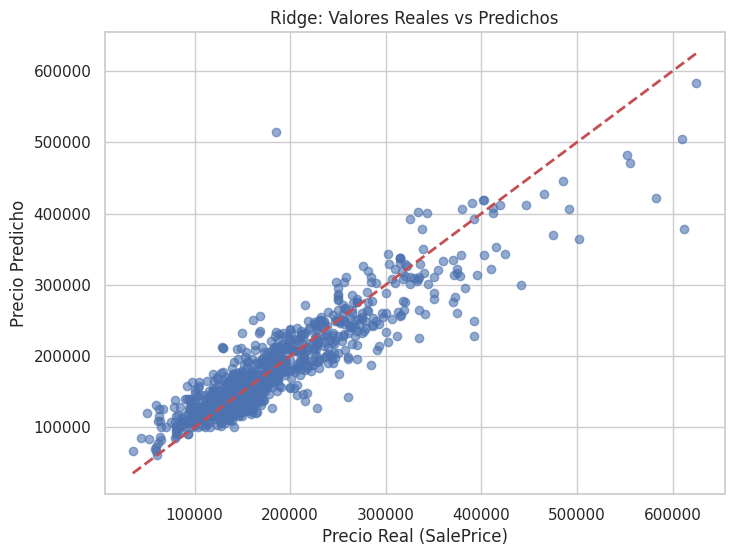

In [36]:

y_pred = ridge.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Precio Real (SalePrice)")
plt.ylabel("Precio Predicho")
plt.title("Ridge: Valores Reales vs Predichos")
plt.show()


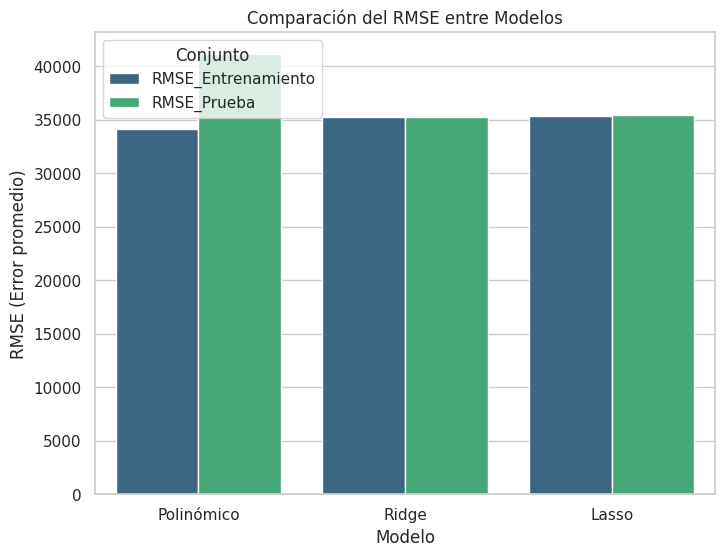

In [37]:

resultados = pd.DataFrame({
    'Modelo': ['Polinómico', 'Ridge', 'Lasso'],
    'RMSE_Entrenamiento': [34152.34, 35204.89, 35352.92],
    'RMSE_Prueba': [41101.60, 35206.63, 35447.71]
})

# Graficar barras
resultados_melted = resultados.melt(id_vars='Modelo', var_name='Conjunto', value_name='RMSE')
plt.figure(figsize=(8,6))
sns.barplot(data=resultados_melted, x='Modelo', y='RMSE', hue='Conjunto', palette='viridis')
plt.title("Comparación del RMSE entre Modelos")
plt.ylabel("RMSE (Error promedio)")
plt.show()
